In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import cv2
import statistics
import random
import math
from skimage import io, color
from skimage import exposure 
from sklearn.cluster import KMeans 

color image matrix size:  (2336, 3504, 3)


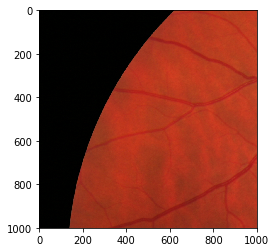

In [3]:
#read the image 
img = io.imread('01_h.jpg')
print('color image matrix size: ', img.shape)
plt.imshow(img) 

#only part of an image
img = img[:1000,:1000]
plt.imshow(img)

#Convert image into format for my k-means algorithm-----------
img_rows = img.shape[0]
img_colmns = img.shape[1]
pixels = img_rows*img_colmns 
features = img.shape[2] 

#assign the input image to "data"
data = np.zeros((pixels,features))
flag = 0
for i in range(img_rows): #image rows
    for j in range(img_colmns): #image columns
        for k in range(features): #features 
            data[flag,k] = img[i,j,k] #data's rows read down the img like a book (scan colmns then rows)
        flag = flag+1

In [8]:
import time
time_start = time.clock()

n_clusters = 3
kmeans = KMeans(n_clusters)
kmeans = kmeans.fit(data)
labels = kmeans.predict(data)
centroids = kmeans.cluster_centers_

time_elapsed = (time_clock() - time_start)
print('time elapsed: ',time_elapsed)

C:\Users\astud\Anaconda3\lib\site-packages\sklearn\cluster\k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return_n_iter=True)


In [6]:
print(centroids)
print(labels)

[[1.85179740e+02 5.67152637e+01 3.14478855e+01]
 [5.73678571e-01 8.00318182e-01 1.76097403e-01]
 [1.59609003e+02 4.92568769e+01 2.87349090e+01]]
[1 1 1 ... 2 2 2]


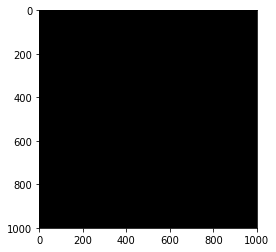

In [9]:
#assign colors to each cluster, convert to original picture format and plot 
colors = np.array([[0,0,0],[205,92,92],[188,143,143]])
data = np.zeros((pixels,features))
for i in range(n_clusters):
    for j in range(pixels):
        if labels[j] == i:
            for m in range(features):
                data[j,m] = colors[i,m]

new_img = np.zeros((img.shape[0],img.shape[1],features))
flag = 0
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        for m in range(features):
            new_img[i,j,m] = int(data[flag,m])
        flag = flag+1
        
#plot
new_img = new_img.astype(np.int64)
plt.imshow(new_img)